In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
    
#имена классов
classes = ("hotgot", "not_hot_dog")

#путь до датасета
PATH = "/content/dataset"

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((64,64)),  
     transforms.ToTensor(),   
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) 

dataset_train = datasets.ImageFolder('/content/drive/My Drive/Hotdogs/train', transform=transform)

trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=5, shuffle=True)


dataset_test = datasets.ImageFolder('/content/drive/My Drive/Hotdogs/test', transform=transform)

testloader = torch.utils.data.DataLoader(dataset_test, batch_size=5, shuffle=False)

Real Labels:  not_hot_dog not_hot_dog hotgot hotgot


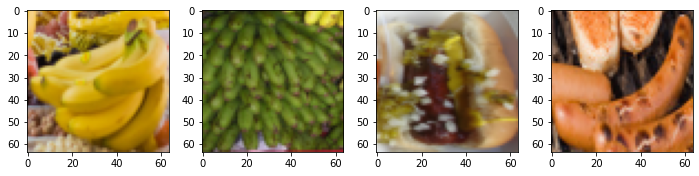

In [ ]:
images, labels = next(iter(trainloader))
image_shower(images, labels)

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
#заморозим веса
for param in model.parameters():
    param.require = False

#так как у нас 2 класса, нужно переопределить последний слой сети под нашу задачу
model.fc = nn.Linear(512, 2)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

In [ ]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader)):

        inputs, labels = data[0].to(device), data[1].to(device)
        #сбрасываем накопленный градиент 
        optimizer.zero_grad()
        #прогоняем изображения через модель, чтобы получить предсказание
        outputs = model(inputs)
        #рассчитываем функцию потерь (насколько хорошо предсказали)
        loss = criterion(outputs, labels)
        #считаем градиенты (обратный проход)
        loss.backward()
        #делаем шаг оптимизатора (обновляем веса)
        optimizer.step()

        running_loss += loss.item()

    print ("Epoch {} - Training loss: {} ".format(epoch, running_loss/len(trainloader)))

400it [03:13,  2.07it/s]


Epoch 0 - Training loss: 0.6111922878713812 


400it [01:55,  3.45it/s]


Epoch 1 - Training loss: 0.46597439751261843 


400it [01:55,  3.45it/s]


Epoch 2 - Training loss: 0.35493922789290083 


400it [01:54,  3.50it/s]


Epoch 3 - Training loss: 0.3691013311664574 


400it [01:54,  3.50it/s]


Epoch 4 - Training loss: 0.2963148740015458 


400it [01:52,  3.55it/s]


Epoch 5 - Training loss: 0.34930980278644713 


400it [01:53,  3.51it/s]


Epoch 6 - Training loss: 0.29397713146114257 


400it [01:52,  3.54it/s]


Epoch 7 - Training loss: 0.25184274325416484 


400it [01:52,  3.56it/s]


Epoch 8 - Training loss: 0.2391904402291402 


400it [01:47,  3.72it/s]

Epoch 9 - Training loss: 0.1887161913613818 


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    #переводим модель в режим инференса
    model.eval()
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        #получаем наши предсказания
        _, predicted = torch.max(outputs.data, 1)
        #посчитаем общее количество картинок
        total += labels.size(0)
        #посчитаем количество точно классифицированных картинок
        correct += (predicted == labels).sum().item()
print("Accuracy: %d" %(100 * correct/total))


Accuracy: 88


Real Labels:  hotgot hotgot hotgot hotgot
Predicted:  hotgot hotgot hotgot hotgot


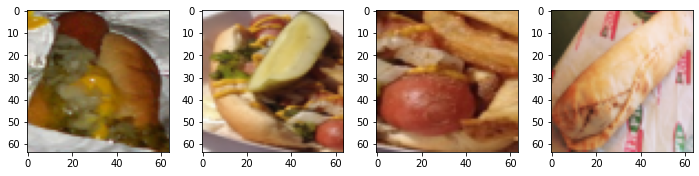

In [ ]:
images, labels = next(iter(testloader))
image_shower(images, labels)

outputs = model(images.to(device))

_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("%5s" %classes[predict] for predict in predicted[:4]))